In [3]:
import os
import cv2
import argparse

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm 
import random

In [4]:
def get_frame_count(input_video):
    '''
    func to count number of frames in input video
    ''' 
    count = 0
    vid = cv2.VideoCapture(input_video)
    while(True):
        ret, frame = vid.read()
        if(ret == False):
            break
        count += 1
    return count


def get_gaze_point(gt_point):
    '''
    func to return the center of the object bounding box
    '''
    bbox = gt_point
    pt1 = (bbox[:,3] + bbox[:,1])/2
    pt2 = (bbox[:,4] + bbox[:,2])/2
    pt1 = np.expand_dims(pt1, axis =1)
    pt2 = np.expand_dims(pt2, axis =1)
    gt_point = np.hstack((pt1.astype(int), pt2.astype(int)))
    return gt_point


def visualize_data(path, drivers, display_nsamples = 2):
    '''
    Visualize DGAZE dataset
    '''
    
    for driver in drivers:

        print(f'--> Processing for {driver}')

        nsamples = len(os.listdir(os.path.join(path, 'dataset', driver, 'driver_view')))
        nsamples_range = list(np.arange(1, nsamples+1))
        random.shuffle(nsamples_range)
        samples_list = nsamples_range[:display_nsamples]
        
        for sample_no in tqdm(samples_list):
            driver_view = os.path.join(path, 'dataset', driver, 'driver_view', 'sample' + str(sample_no) +'.avi')            
            road_view = os.path.join(path,  'dataset', driver, 'road_view', 'sample' + str(sample_no) +'.avi')
            gaze_point_path = os.path.join(path,  'dataset', driver, 'road_view', 'sample' + str(sample_no) +'.npy')
            gt_point = np.load(gaze_point_path, allow_pickle=True)

            if sample_no >= 10:
                gt_point = get_gaze_point(gt_point)

            cap_driver_view = cv2.VideoCapture(driver_view) # read driver view
            cap_road_view = cv2.VideoCapture(road_view) # read road view
            nframes = get_frame_count(driver_view) # frame count 
            
            count = 0
            while(count < nframes):   
                ret1, frame1 = cap_driver_view.read()
                ret2, frame2 = cap_road_view.read()
                if(ret1 == False or ret2 == False):
                    break
                count += 1
                if count == 20:
                    break

            frame1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB)
            frame2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2RGB)
            
            for j in range(gt_point.shape[0]):
                frame2 = cv2.circle(frame2, (gt_point[j][0], gt_point[j][1]), 1, (255, 0, 0), 50)

            frame = np.concatenate((frame1, frame2), axis = 1)
            plt.figure(figsize =(10,10))
            plt.imshow(frame)
            plt.show()


  0%|          | 0/2 [00:00<?, ?it/s]

--> Processing for driver8


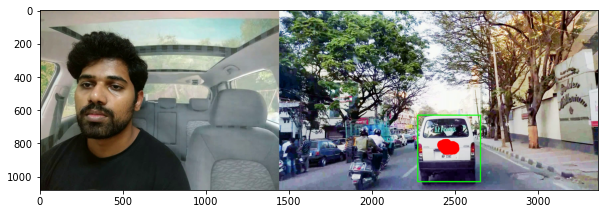

 50%|█████     | 1/2 [00:02<00:02,  2.90s/it]

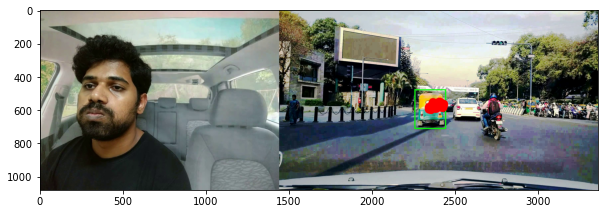

  0%|          | 0/2 [00:00<?, ?it/s]

--> Processing for driver20


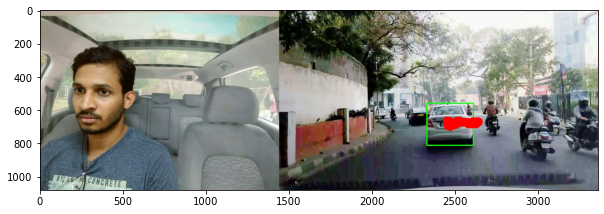

 50%|█████     | 1/2 [00:02<00:02,  2.99s/it]

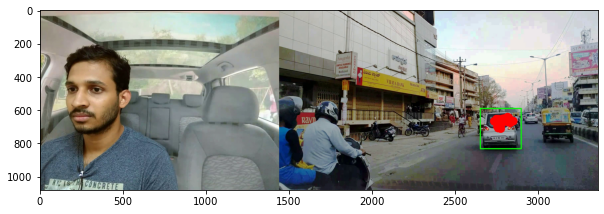

  0%|          | 0/2 [00:00<?, ?it/s]

--> Processing for driver23


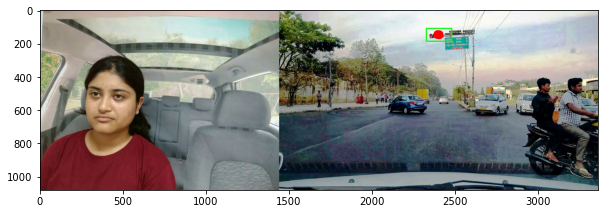

 50%|█████     | 1/2 [00:02<00:02,  2.43s/it]

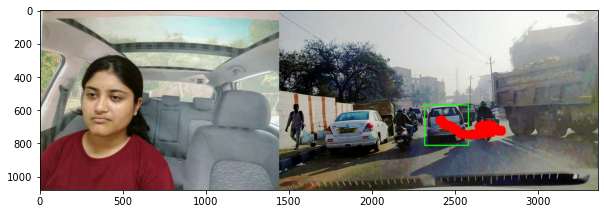

  0%|          | 0/2 [00:00<?, ?it/s]

--> Processing for driver13


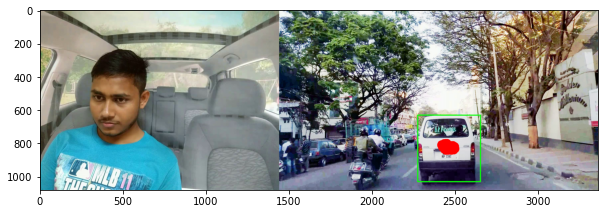

 50%|█████     | 1/2 [00:02<00:02,  2.87s/it]

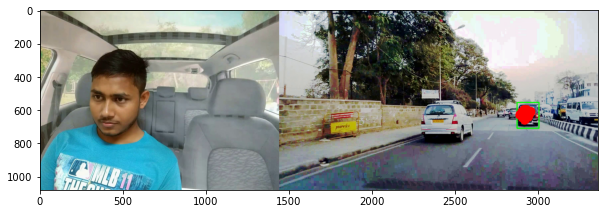

100%|██████████| 2/2 [00:05<00:00,  2.84s/it]


In [6]:
path = '/ssd_scratch/cvit/isha_thrupthi/eye_gaze_mapping/DGAZE/'
display_ndrivers = 4
display_nsamples = 2

drivers = os.listdir(os.path.join(path, 'dataset'))
random.shuffle(drivers)
visualize_data(path, drivers[:display_ndrivers], display_nsamples = display_nsamples)